In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Step 1**

Read the file train.csv into Python and print a few rows.

In [14]:
df_Train = pd.read_csv('train.csv')
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_Train.info()  #get info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Step 2**

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

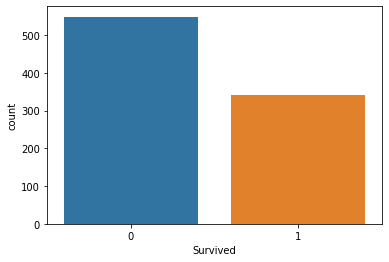

In [4]:
sns.countplot(data=df_Train, x='Survived')

**Step 3**

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.


In [5]:
Survived_in_class_1= df_Train[(df_Train['Pclass'] == 1) & (df_Train['Survived'] == 1)]
class_1=df_Train[df_Train['Pclass'] == 1]
proportion = (Survived_in_class_1['Survived'].count())/(class_1['Pclass']).count()
proportion

0.6296296296296297

**Step 4**


Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


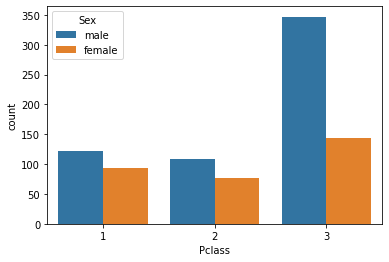

In [6]:
sns.countplot(data=df_Train, x='Pclass' , hue='Sex')

**Step 5**

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

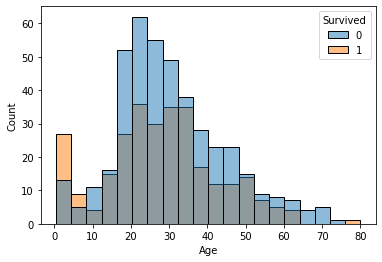

In [7]:
sns.histplot(data=df_Train, x='Age',hue='Survived', alpha=0.5)

**Step 6**

Calculate the average age for survived and drowned passengers separately.

In [8]:
df_Train.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


**Step 7**

Replace missing age values by the mean age.

In [15]:
df_Train['Age'] = df_Train['Age'].fillna(value=(df_Train['Age']).mean())  
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Step 8**

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [19]:
df_Train.groupby(['Pclass','Sex']).count()

PassengerId  Survived  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Pclass Sex                                       ...                               
1      female           94        94    94   94  ...      94    94     81        92
       male            122       122   122  122  ...     122   122     95       122
2      female           76        76    76   76  ...      76    76     10        76
       male            108       108   108  108  ...     108   108      6       108
3      female          144       144   144  144  ...     144   144      6       144
       male            347       347   347  347  ...     347   347      6       347

[6 rows x 10 columns]

**2.2**

Prepeare data for training

In [53]:
y=df_Train['Survived']
X=df_Train.drop(labels=['PassengerId','Survived','Name', 'Ticket','Cabin', 'Embarked'], axis=1)
X['Sex_male_1']=(X['Sex'] == 'male')
X.drop(labels='Sex', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [54]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male_1
0,3,22.000000,1,0,7.2500,True
1,1,38.000000,1,0,71.2833,False
2,3,26.000000,0,0,7.9250,False
3,1,35.000000,1,0,53.1000,False
4,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True
887,1,19.000000,0,0,30.0000,False
888,3,29.699118,1,2,23.4500,False
889,1,26.000000,0,0,30.0000,True


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male_1  891 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 35.8 KB


In [41]:
X_train.shape, X_test.shape

((668,), (223,))

In [42]:
y_train.shape, y_test.shape

((668, 7), (223, 7))

In [45]:
from sklearn.dummy import DummyClassifier

In [55]:
model = DummyClassifier(strategy='most_frequent') #initialize the model
model.fit(X_train, y_train)   # trains the model
model.score(X_train, y_train) # calculates accuracy

0.6182634730538922

In [58]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

**Test another model**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# Define the model and its hyper parameters
model = LogisticRegression(C=1.0, max_iter=1000)

# train the model 
model.fit(X_train, y_train)

# print trainin set accuracy
train_acc_log = round(model.score(X_train, y_train) * 100, 2)
print("Prediction accuracy (Training Set):", train_acc_log, "%\n")

# Check and print prediction accuracy and model parameters
test_acc_log = round(model.score(X_test, y_test) * 100, 2)
print("Prediction accuracy (Test Set):", test_acc_log, "%\n")


Prediction accuracy (Training Set): 80.39 %

Prediction accuracy (Test Set): 75.78 %



In [61]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0])